In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Sagar\anaconda3\envs\CapstoneProjecct\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2,2,2.0,New Property,850.0,0,0,0,0,0,2,8
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2,2,4.0,New Property,1226.0,1,1,0,0,0,2,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2,1,17.0,New Property,1000.0,0,0,0,0,0,2,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,0,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2,1,5.0,Relatively New,582.0,0,0,1,0,0,2,159


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2,2,2.0,New Property,850.0,0,0,0,0,0,2,8
1,flat,sector 89,0.95,2.0,2,2,4.0,New Property,1226.0,1,1,0,0,0,2,38
2,flat,sohna road,0.32,2.0,2,1,17.0,New Property,1000.0,0,0,0,0,0,2,49
3,flat,sector 92,1.60,3.0,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,0,174
4,flat,sector 102,0.48,2.0,2,1,5.0,Relatively New,582.0,0,0,1,0,0,2,159


# luxury_score

<Axes: >

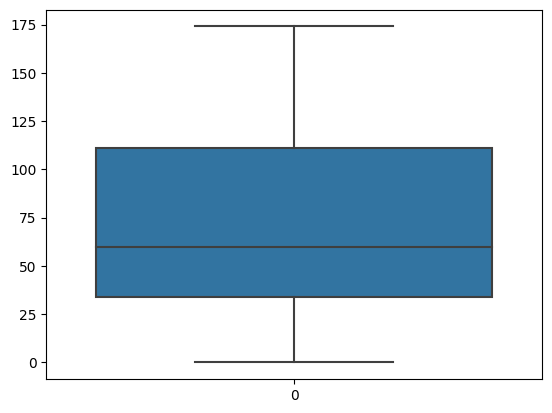

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2,2,2.0,New Property,850.0,0,0,0,0,0,2,8,Low
1,flat,sector 89,0.95,2.0,2,2,4.0,New Property,1226.0,1,1,0,0,0,2,38,Low
2,flat,sohna road,0.32,2.0,2,1,17.0,New Property,1000.0,0,0,0,0,0,2,49,Low
3,flat,sector 92,1.60,3.0,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,0,174,High
4,flat,sector 102,0.48,2.0,2,1,5.0,Relatively New,582.0,0,0,1,0,0,2,159,High


# floorNum

<Axes: >

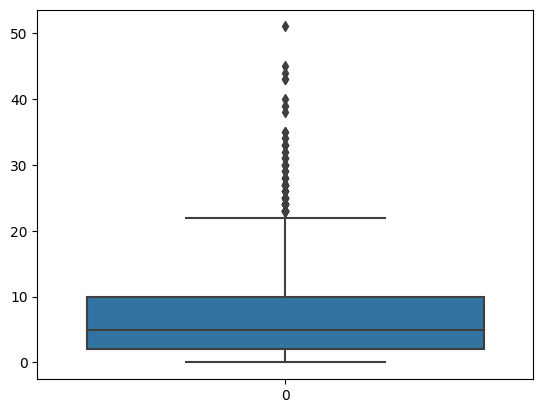

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [16]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2,2,New Property,850.0,0,0,0,0,0,2,Low,Low Floor
1,flat,sector 89,0.95,2.0,2,2,New Property,1226.0,1,1,0,0,0,2,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2,1,New Property,1000.0,0,0,0,0,0,2,Low,High Floor
3,flat,sector 92,1.60,3.0,4,3+,Relatively New,1615.0,0,1,0,0,1,0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2,1,Relatively New,582.0,0,0,1,0,0,2,High,Mid Floor


In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [19]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,40.0,3.0,2,2.0,1.0,850.0,0,0,0,0,0,2,1.0,1.0
1,0.0,101.0,2.0,2,2.0,1.0,1226.0,1,1,0,0,0,2,1.0,2.0
2,0.0,111.0,2.0,2,1.0,1.0,1000.0,0,0,0,0,0,2,1.0,0.0
3,0.0,105.0,3.0,4,4.0,3.0,1615.0,0,1,0,0,1,0,0.0,2.0
4,0.0,4.0,2.0,2,1.0,3.0,582.0,0,0,1,0,0,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,96.0,2.0,2,1.0,3.0,532.0,0,0,0,0,0,2,2.0,2.0
3550,1.0,11.0,5.0,5,4.0,3.0,6228.0,1,1,1,1,0,2,0.0,1.0
3551,0.0,25.0,1.0,1,1.0,0.0,665.0,0,0,0,0,0,0,2.0,2.0
3552,1.0,50.0,5.0,6,3.0,0.0,5490.0,1,1,1,1,0,2,2.0,2.0


In [20]:
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
        ...  
3549     0.37
3550     6.00
3551     0.60
3552    15.50
3553     1.78
Name: price, Length: 3554, dtype: float64

# 1.Correlation analysis

<Axes: >

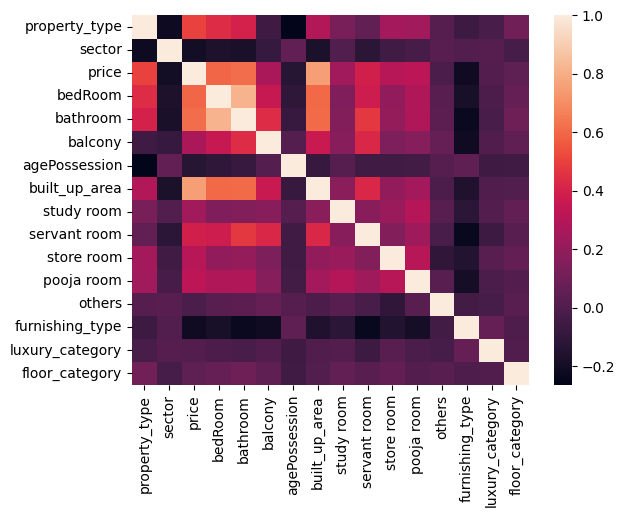

In [21]:
 sns.heatmap(data_label_encoded.corr())

In [22]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.201678
1,price,1.000000
2,bedRoom,0.591380
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.132989
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


# 2.Random forest feature importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.649967
1,sector,0.104239
0,property_type,0.100101
3,bathroom,0.026532
2,bedRoom,0.024090
8,servant room,0.019300
5,agePossession,0.014426
4,balcony,0.012956
9,store room,0.008691
7,study room,0.008495


# 3.Gradient boosting 

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.683804
1,sector,0.101077
0,property_type,0.096954
2,bedRoom,0.038037
3,bathroom,0.035885
8,servant room,0.021556
9,store room,0.009544
7,study room,0.004304
5,agePossession,0.003799
4,balcony,0.001937


# 4.Permutation importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.738082
0,property_type,0.203951
1,sector,0.183109
2,bedRoom,0.022835
8,servant room,0.022187
3,bathroom,0.018867
5,agePossession,0.006945
4,balcony,0.001631
13,luxury_category,0.001539
9,store room,0.001499


# 5.LASSO

In [27]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.511626
0,property_type,0.713580
3,bathroom,0.279542
9,store room,0.198763
7,study room,0.175293
8,servant room,0.166623
10,pooja room,0.074916
13,luxury_category,0.050955
2,bedRoom,0.017345
5,agePossession,-0.000000


# 6.RFE

In [28]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.651050
0,property_type,0.102632
1,sector,0.102507
3,bathroom,0.026312
2,bedRoom,0.025311
8,servant room,0.019887
5,agePossession,0.013994
4,balcony,0.011683
9,store room,0.007928
10,pooja room,0.007517


# 7.Linear regression weight

In [30]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.514198
0,property_type,0.713500
3,bathroom,0.286175
9,store room,0.203064
7,study room,0.183480
8,servant room,0.175967
10,pooja room,0.077877
13,luxury_category,0.062250
2,bedRoom,0.020326
5,agePossession,0.001376


# 8.SHAP

In [32]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


array([[-0.18129056,  0.12285935, -0.02579182, ..., -0.00789178,
        -0.00546359, -0.00820044],
       [-0.19865669, -0.40651219, -0.05194111, ..., -0.00581696,
        -0.00462637, -0.00482486],
       [-0.17378387, -0.4308688 , -0.04791508, ..., -0.00962935,
        -0.0131435 , -0.01869687],
       ...,
       [-0.17917218,  0.07738114, -0.01380631, ...,  0.01871349,
         0.01529468, -0.00371692],
       [ 1.4775931 ,  1.00667786,  0.37979704, ...,  0.09562238,
         0.01145876,  0.02371712],
       [-0.31957051,  0.02143253, -0.02157675, ...,  0.02574511,
        -0.00777802,  0.03503869]])

In [33]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.251607
0,property_type,0.471672
1,sector,0.385341
3,bathroom,0.112790
8,servant room,0.096054
2,bedRoom,0.054138
4,balcony,0.041498
5,agePossession,0.026762
14,floor_category,0.024423
12,furnishing_type,0.020110


In [34]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [35]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.201678,0.104239,0.101077,0.183109,-0.052724,0.102507,-0.061598,0.385341
bedRoom,0.591380,0.024090,0.038037,0.022835,0.017345,0.025311,0.020326,0.054138
bathroom,0.609777,0.026532,0.035885,0.018867,0.279542,0.026312,0.286175,0.112790
balcony,0.269637,0.012956,0.001937,0.001631,-0.044796,0.011683,-0.067800,0.041498
agePossession,-0.132989,0.014426,0.003799,0.006945,-0.000000,0.013994,0.001376,0.026762
built_up_area,0.748574,0.649967,0.683804,0.738082,1.511626,0.651050,1.514198,1.251607
study room,0.242955,0.008495,0.004304,-0.013716,0.175293,0.007066,0.183480,0.019219
servant room,0.391930,0.019300,0.021556,0.022187,0.166623,0.019887,0.175967,0.096054
store room,0.305677,0.008691,0.009544,0.001499,0.198763,0.007928,0.203064,0.017270


In [36]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [37]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.711305
sector             0.142640
bathroom           0.034372
bedRoom            0.029262
servant room       0.027229
agePossession      0.011148
balcony            0.010227
store room         0.007775
floor_category     0.005495
luxury_category    0.005442
furnishing_type    0.004997
pooja room         0.004348
study room         0.003470
others             0.002291
dtype: float64

In [38]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,40.0,3.0,2,2.0,1.0,850.0,0,0,0,0,0,2,1.0,1.0
1,0.0,101.0,2.0,2,2.0,1.0,1226.0,1,1,0,0,0,2,1.0,2.0
2,0.0,111.0,2.0,2,1.0,1.0,1000.0,0,0,0,0,0,2,1.0,0.0
3,0.0,105.0,3.0,4,4.0,3.0,1615.0,0,1,0,0,1,0,0.0,2.0
4,0.0,4.0,2.0,2,1.0,3.0,582.0,0,0,1,0,0,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,96.0,2.0,2,1.0,3.0,532.0,0,0,0,0,0,2,2.0,2.0
3550,1.0,11.0,5.0,5,4.0,3.0,6228.0,1,1,1,1,0,2,0.0,1.0
3551,0.0,25.0,1.0,1,1.0,0.0,665.0,0,0,0,0,0,0,2.0,2.0
3552,1.0,50.0,5.0,6,3.0,0.0,5490.0,1,1,1,1,0,2,2.0,2.0


In [39]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [40]:
scores.mean()

0.822815336120299

In [41]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [42]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [43]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [44]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,40.0,3.0,2,2.0,1.0,850.0,0,0,2,1.0,1.0,0.82
1,0.0,101.0,2.0,2,2.0,1.0,1226.0,1,0,2,1.0,2.0,0.95
2,0.0,111.0,2.0,2,1.0,1.0,1000.0,0,0,2,1.0,0.0,0.32
3,0.0,105.0,3.0,4,4.0,3.0,1615.0,1,0,0,0.0,2.0,1.60
4,0.0,4.0,2.0,2,1.0,3.0,582.0,0,1,2,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,96.0,2.0,2,1.0,3.0,532.0,0,0,2,2.0,2.0,0.37
3550,1.0,11.0,5.0,5,4.0,3.0,6228.0,1,1,2,0.0,1.0,6.00
3551,0.0,25.0,1.0,1,1.0,0.0,665.0,0,0,0,2.0,2.0,0.60
3552,1.0,50.0,5.0,6,3.0,0.0,5490.0,1,1,2,2.0,2.0,15.50
